In [48]:
#Import the usual modules
import pandas as pd
import numpy as np

> Family home creation allowance (CSOK) The CSOK is a subsidy granted by the Government of Hungary.
>The Family Homebuyer's Allowance (CSOK, formerly known as "Szocpol") is a non-refundable grant for the purchase or construction of a new dwelling or for the purchase or extension of a second-hand dwelling. 

>The Government Decree No. 16/2016 (II.10.) provides for the housing subsidy for the construction or purchase of new dwellings, while the Government Decree No. 17/2016 (II.10.) provides for the family home creation subsidy for the purchase or extension of used dwellings. 

>The benefit is available to eligible persons, provided the statutory conditions are met, for at least one - existing and/or adopted - child. The benefit is of the following types:

>Family home creation allowance (CSOK): eligible persons may claim this allowance for their existing child(ren) living in the same household as them and moving into the dwelling to be purchased or built with them, or, in the case of an extension of a dwelling, living with them. An unborn/twin child(ren) aged 12 weeks or older at the time of application will also be considered as an existing child(ren).

>Advance Family Home Subsidy (MCSOK): eligible persons who are a young married couple (at least one of whom is under 40 years of age at the time of application) can claim this benefit for their child(ren).

>Family Home Building Allowance and Advance Family Home Building Allowance (CSOK+MCSOK): for eligible persons for existing children and children they are sponsoring.


The Hungarian governments aim with CSOK is to motivate higher birth rates. 
The following project would like to take a statistical look at the Hungarian birth numbers and the effect CSOK had on them.

I would like to test to following hypotheses.

- H0: CSOK had no effect on the live birth numbers

- H1: the distributions of one or more samples are not equal, CSOK influences the birth numbers



## DATA CLEANING

In [49]:
data = pd.read_excel("stadat-nep0001-22.1.1.1-hu.xlsx", sheet_name="22.1.1.1.", skiprows=1, index_col=0)
data.dropna(axis=0, how="all", inplace=True)
data.head()

,1941,1949,1960,1970,1980,1990,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Denomination,,,,,,,,,,,,,,,,,,,,,
"Population, 1 January males",4560875,4423420.0,4804043.0,5003651.0,5188709.0,4984904.0,4851012.0,4836980.0,4818456.0,4804113.0,...,4.715953e+06,4.703391e+06,4.695779e+06,4.688519e+06,4.675291e+06,4.671602e+06,4.675821e+06,4.680790e+06,4.663794e+06,4644875
"Population, 1 January females",4755199,4781379.0,5157001.0,5318448.0,5520754.0,5389919.0,5349286.0,5337873.0,5323906.0,5312629.0,...,5.192845e+06,5.173974e+06,5.159792e+06,5.141966e+06,5.122270e+06,5.106769e+06,5.096935e+06,5.088736e+06,5.066978e+06,5044135
"Population, 1 January total",9316074,9204799.0,9961044.0,10322099.0,10709463.0,10374823.0,10200298.0,10174853.0,10142362.0,10116742.0,...,9.908798e+06,9.877365e+06,9.855571e+06,9.830485e+06,9.797561e+06,9.778371e+06,9.772756e+06,9.769526e+06,9.730772e+06,9689010
males,31,31.5,32.5,34.3,34.6,35.5,37.1,37.3,37.5,37.7,...,3.949498e+01,3.969642e+01,3.987947e+01,4.004965e+01,4.021670e+01,4.034693e+01,4.047639e+01,4.062819e+01,4.075087e+01,40.815367
females,32.1,33.3,34.8,37.0,37.7,39.0,41.1,41.3,41.6,41.8,...,4.368246e+01,4.388205e+01,4.406897e+01,4.423080e+01,4.440810e+01,4.453463e+01,4.466682e+01,4.480035e+01,4.491188e+01,44.976705


In [50]:
data_transposed = data.transpose()
data_transposed.head(50)

Denomination,"Population, 1 January males","Population, 1 January females","Population, 1 January total",males,females,total,Ageing index,Number of females per thousand males,Density per km2,number,...,females,total,number,per hundred live-born,number,per hundred live-born,number,per hundred live-born,number,per thousand live-born
1941,4560875,4755199,9316074,31,32.1,31.6,26.901038,1042.606737,100.140535,79074,...,58.24,..,..,..,..,..,..,..,20458,115.6
1949,4423420.0,4781379.0,9204799.0,31.5,33.3,32.4,30.266409,1080.923584,98.944416,107820.0,...,63.4,61.36,1707.0,0.9,38428.0,19.6,40135.0,20.5,17327.0,91.0
1960,4804043.0,5157001.0,9961044.0,32.5,34.8,33.6,35.195791,1073.471033,107.07346,88566.0,...,70.1,68.03,162160.0,110.7,35756.0,24.4,197916.0,135.1,6976.0,47.6
1970,5003651.0,5318448.0,10322099.0,34.3,37.0,35.7,54.421971,1062.913461,110.95452,96612.0,...,72.08,69.2,192283.0,126.7,31357.0,20.6,223640.0,147.3,5449.0,35.9
1980,5188709.0,5520754.0,10709463.0,34.6,37.7,36.2,61.911102,1063.99376,115.118381,80331.0,...,72.7,69.02,80882.0,54.4,21128.0,14.2,102010.0,68.6,3443.0,23.2
1990,4984904.0,5389919.0,10374823.0,35.5,39.0,37.3,64.486759,1081.248305,111.521262,66405.0,...,73.71,69.33,90394.0,71.9,18295.0,14.6,108689.0,86.5,1863.0,14.8
2001,4851012.0,5349286.0,10200298.0,37.1,41.1,39.2,91.311037,1102.715475,109.645254,43583.0,...,76.46,72.32,56404.0,58.1,16292.0,16.8,72696.0,74.9,789.0,8.1
2002,4836980.0,5337873.0,10174853.0,37.3,41.3,39.4,93.482492,1103.554904,109.37174,46008.0,...,76.56,72.43,56075.0,57.9,17035.0,17.6,73110.0,75.5,693.0,7.2
2003,4818456.0,5323906.0,10142362.0,37.5,41.6,39.6,95.443255,1104.898748,109.022487,45398.0,...,76.53,72.43,53789.0,56.8,16845.0,17.8,70634.0,74.6,690.0,7.3
2004,4804113.0,5312629.0,10116742.0,37.7,41.8,39.8,97.570102,1105.850133,108.747092,43791.0,...,76.91,72.78,52539.0,55.2,16879.0,17.7,69418.0,73.0,628.0,6.6


In [51]:
population = data_transposed[["Population, 1 January total", "Live births number", "Natural increase or decrease (–) number"]]
population.reset_index(inplace=True)
population.rename(columns={"index": "Year"}, inplace=True)
population.head(50)

c:\Users\sznik\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Denomination,Year,"Population, 1 January total",Live births number,Natural increase or decrease (–) number
0,1941,9316074,177047,53698
1,1949,9204799.0,190398.0,84680.0
2,1960,9961044.0,146461.0,44936.0
3,1970,10322099.0,151819.0,31622.0
4,1980,10709463.0,148673.0,3318.0
5,1990,10374823.0,125679.0,-19981.0
6,2001,10200298.0,97047.0,-35136.0
7,2002,10174853.0,96804.0,-36029.0
8,2003,10142362.0,94647.0,-41176.0
9,2004,10116742.0,95137.0,-37355.0


In [52]:
population.dtypes

Denomination
Year                                        int64
Population, 1 January total                object
Live births number                         object
Natural increase or decrease (–) number    object
dtype: object

In [53]:
population = population[population["Live births number"] != ".."]
population = population[population["Natural increase or decrease (–) number"] != ".."]
population.head(50)

Denomination,Year,"Population, 1 January total",Live births number,Natural increase or decrease (–) number
0,1941,9316074,177047,53698
1,1949,9204799.0,190398.0,84680.0
2,1960,9961044.0,146461.0,44936.0
3,1970,10322099.0,151819.0,31622.0
4,1980,10709463.0,148673.0,3318.0
5,1990,10374823.0,125679.0,-19981.0
6,2001,10200298.0,97047.0,-35136.0
7,2002,10174853.0,96804.0,-36029.0
8,2003,10142362.0,94647.0,-41176.0
9,2004,10116742.0,95137.0,-37355.0


In [54]:
population = population.astype({"Population, 1 January total":"float", "Live births number":"float", "Natural increase or decrease (–) number":"float"})

In [55]:
population.dtypes

Denomination
Year                                         int64
Population, 1 January total                float64
Live births number                         float64
Natural increase or decrease (–) number    float64
dtype: object

<div class="alert alert-block alert-success">
<b>Result:</b> At this point we have a dataframe of relevant data, in the right format
</div>

In [85]:
population.to_excel("Cleaned Data of Population.xlsx", index=False)
population.head(50)

Denomination,Year,"Population, 1 January total",Live births number,Natural increase or decrease (–) number,Interest_category
0,1941,9316074.0,177047.0,53698.0,Not Interesting
1,1949,9204799.0,190398.0,84680.0,Not Interesting
2,1960,9961044.0,146461.0,44936.0,Not Interesting
3,1970,10322099.0,151819.0,31622.0,Not Interesting
4,1980,10709463.0,148673.0,3318.0,Not Interesting
5,1990,10374823.0,125679.0,-19981.0,Not Interesting
6,2001,10200298.0,97047.0,-35136.0,Pre-CSOK
7,2002,10174853.0,96804.0,-36029.0,Pre-CSOK
8,2003,10142362.0,94647.0,-41176.0,Pre-CSOK
9,2004,10116742.0,95137.0,-37355.0,Pre-CSOK


### Simple data visualizations to see some trend quickly

<AxesSubplot:xlabel='Year', ylabel='Live births number'>

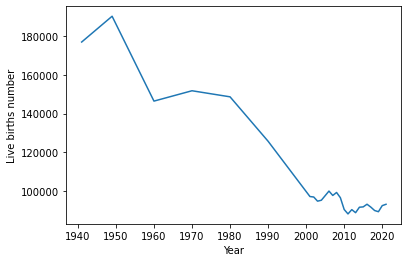

In [57]:
import seaborn as sns

sns.lineplot(data=population, x="Year", y="Live births number")

<AxesSubplot:xlabel='Year', ylabel='Population, 1 January total'>

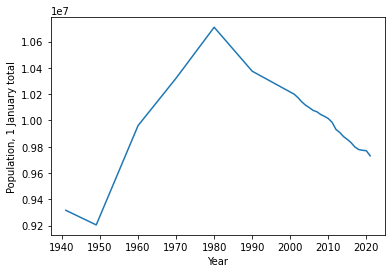

In [58]:
import seaborn as sns

sns.lineplot(data=population, x="Year", y="Population, 1 January total")

In [ ]:
import seaborn as sns

sns.lineplot(data=population, x="Year", y="Population, 1 January total")

### Creating condition of irrelevant data (not yearly data) and pre-CSOK and post-CSOK numbers

I will also create simple list from the live birth numbers for easier handling of the data

In [66]:
# create a list of our conditions
conditions = [
    (population['Year'] < 2001),
    (population['Year'] >= 2001) & (population['Year'] <= 2014),
    (population['Year'] >= 2015)
    ]

# create a list of the values we want to assign for each condition
values = ['Not Interesting', 'Pre-CSOK', 'Post-CSOK']

# create a new column and use np.select to assign values to it using our lists as arguments
population['Interest_category'] = np.select(conditions, values)

# display updated DataFrame
population.head(50)

Denomination,Year,"Population, 1 January total",Live births number,Natural increase or decrease (–) number,Interest_category
0,1941,9316074.0,177047.0,53698.0,Not Interesting
1,1949,9204799.0,190398.0,84680.0,Not Interesting
2,1960,9961044.0,146461.0,44936.0,Not Interesting
3,1970,10322099.0,151819.0,31622.0,Not Interesting
4,1980,10709463.0,148673.0,3318.0,Not Interesting
5,1990,10374823.0,125679.0,-19981.0,Not Interesting
6,2001,10200298.0,97047.0,-35136.0,Pre-CSOK
7,2002,10174853.0,96804.0,-36029.0,Pre-CSOK
8,2003,10142362.0,94647.0,-41176.0,Pre-CSOK
9,2004,10116742.0,95137.0,-37355.0,Pre-CSOK


In [70]:
pre_csok = population.loc[population['Interest_category'] == 'Pre-CSOK']
post_csok = population.loc[population['Interest_category'] == 'Post-CSOK']

In [72]:
pre_csok_births = pre_csok["Live births number"].to_list()
post_csok_births = post_csok["Live births number"].to_list()

# STATISTICAL TESTS

### Shapiro-Wilk Test

Tests whether a data sample has a Gaussian distribution.

Assumptions

Observations in each sample are independent and identically distributed (iid).

Interpretation

- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution.

In [77]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(pre_csok_births)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.910, p=0.159
Probably Gaussian


In [78]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(post_csok_births)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.891, p=0.279
Probably Gaussian


### Student’s t-test

Tests whether the means of two independent samples are significantly different.

Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

Interpretation

- H0: There is no difference in average birth numbers before and after the CSOK regulation. 
- H1: There is some difference in average newborn numbers.

In [86]:

# Example of the Student's t-test
from scipy.stats import ttest_ind

stat, p = ttest_ind(pre_csok_births, post_csok_births)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('The p-value is larger than the significance value, 0.05, so we do not reject the null hypothesis. ')
else:
	print('The p-value is smaller than the significance value, 0.05, so we do reject the null hypothesis. ')

stat=1.895, p=0.073
The p-value is larger than the significance value, 0.05, so we do not reject the null hypothesis. 


### Analysis of Variance Test (ANOVA)

Tests whether the means of two or more independent samples are significantly different.

Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

Interpretation

- H0: There is no difference in average birth numbers before and after the CSOK regulation. 
- H1: There is some difference in average newborn numbers.

In [87]:

# Example of the Analysis of Variance Test
from scipy.stats import f_oneway

stat, p = f_oneway(pre_csok_births, post_csok_births)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('The p-value is larger than the significance value, 0.05, so we do not reject the null hypothesis. ')
else:
	print('The p-value is smaller than the significance value, 0.05, so we do reject the null hypothesis. ')

stat=3.592, p=0.073
The p-value is larger than the significance value, 0.05, so we do not reject the null hypothesis. 
